In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

import utils
import methodprops
import plot_functions as fplot

In [2]:
resdir = "../dsc/results/"
plotdir = "boxplot_vs_cavi"

blockdiag_pkl = os.path.join(resdir, "linreg_blockdiag.pkl")
indep_pkl = os.path.join(resdir, "linreg_indep.pkl")

blockdiag_df = pd.read_pickle(blockdiag_pkl)
indep_df     = pd.read_pickle(indep_pkl)

sparse_blockdiag_df = blockdiag_df[blockdiag_df['simulate.sfix'] != 250]
sparse_indep_df     = indep_df[indep_df['simulate.sfix'] != 250]

In [3]:
blockdiag_df

,simulate,simulate.dims,simulate.sfix,simulate.pve,fit,DSC,mse,coef_mse,niter,elbo,runtime_wall,runtime_cpu,runtime_dsc,convergence
0,blockdiag,"(500,10000)",5,0.6,mr_ash,1,3.125881,0.001191,82,996.923588,5.781000,5.635000,5.803000,1
1,blockdiag,"(500,10000)",5,0.6,mr_ash,2,1.195821,0.000508,83,789.008858,6.425000,6.180000,6.448000,1
2,blockdiag,"(500,10000)",5,0.6,mr_ash,3,0.194262,0.000090,87,353.585227,6.823000,6.621000,6.844000,1
3,blockdiag,"(500,10000)",5,0.6,mr_ash,4,9.630912,0.000679,137,1340.494262,9.208000,9.049000,9.229000,1
4,blockdiag,"(500,10000)",5,0.6,mr_ash,5,1.336688,0.000317,96,791.146657,7.234000,7.064000,7.255000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,blockdiag,"(500,10000)",250,0.6,gradvi_compound_lasso_init,16,106.134988,0.029508,122,1902.865289,46.958205,119.487641,46.958880,1
476,blockdiag,"(500,10000)",250,0.6,gradvi_compound_lasso_init,17,201.864307,0.028225,228,2073.917873,59.377506,178.951328,59.378308,1
477,blockdiag,"(500,10000)",250,0.6,gradvi_compound_lasso_init,18,215.852361,0.037187,154,2062.225463,52.713049,146.100938,52.713735,1
478,blockdiag,"(500,10000)",250,0.6,gradvi_compound_lasso_init,19,31.647101,0.023303,174,1599.092163,54.263902,144.750775,54.264484,1


In [4]:
primary_keys = ['simulate', 'simulate.dims', 'simulate.sfix', 'simulate.pve']
secondary_keys = ['DSC']
unique_keys = ['simulate.sfix', 'simulate.pve']

reference = 'mr_ash_lasso_init'
targets = ['mr_ash', 'mr_ash_lasso_init', 'gradvi_compound', 'gradvi_direct', 'gradvi_compound_lasso_init', 'gradvi_direct_lasso_init']

# ELBO comparison plots

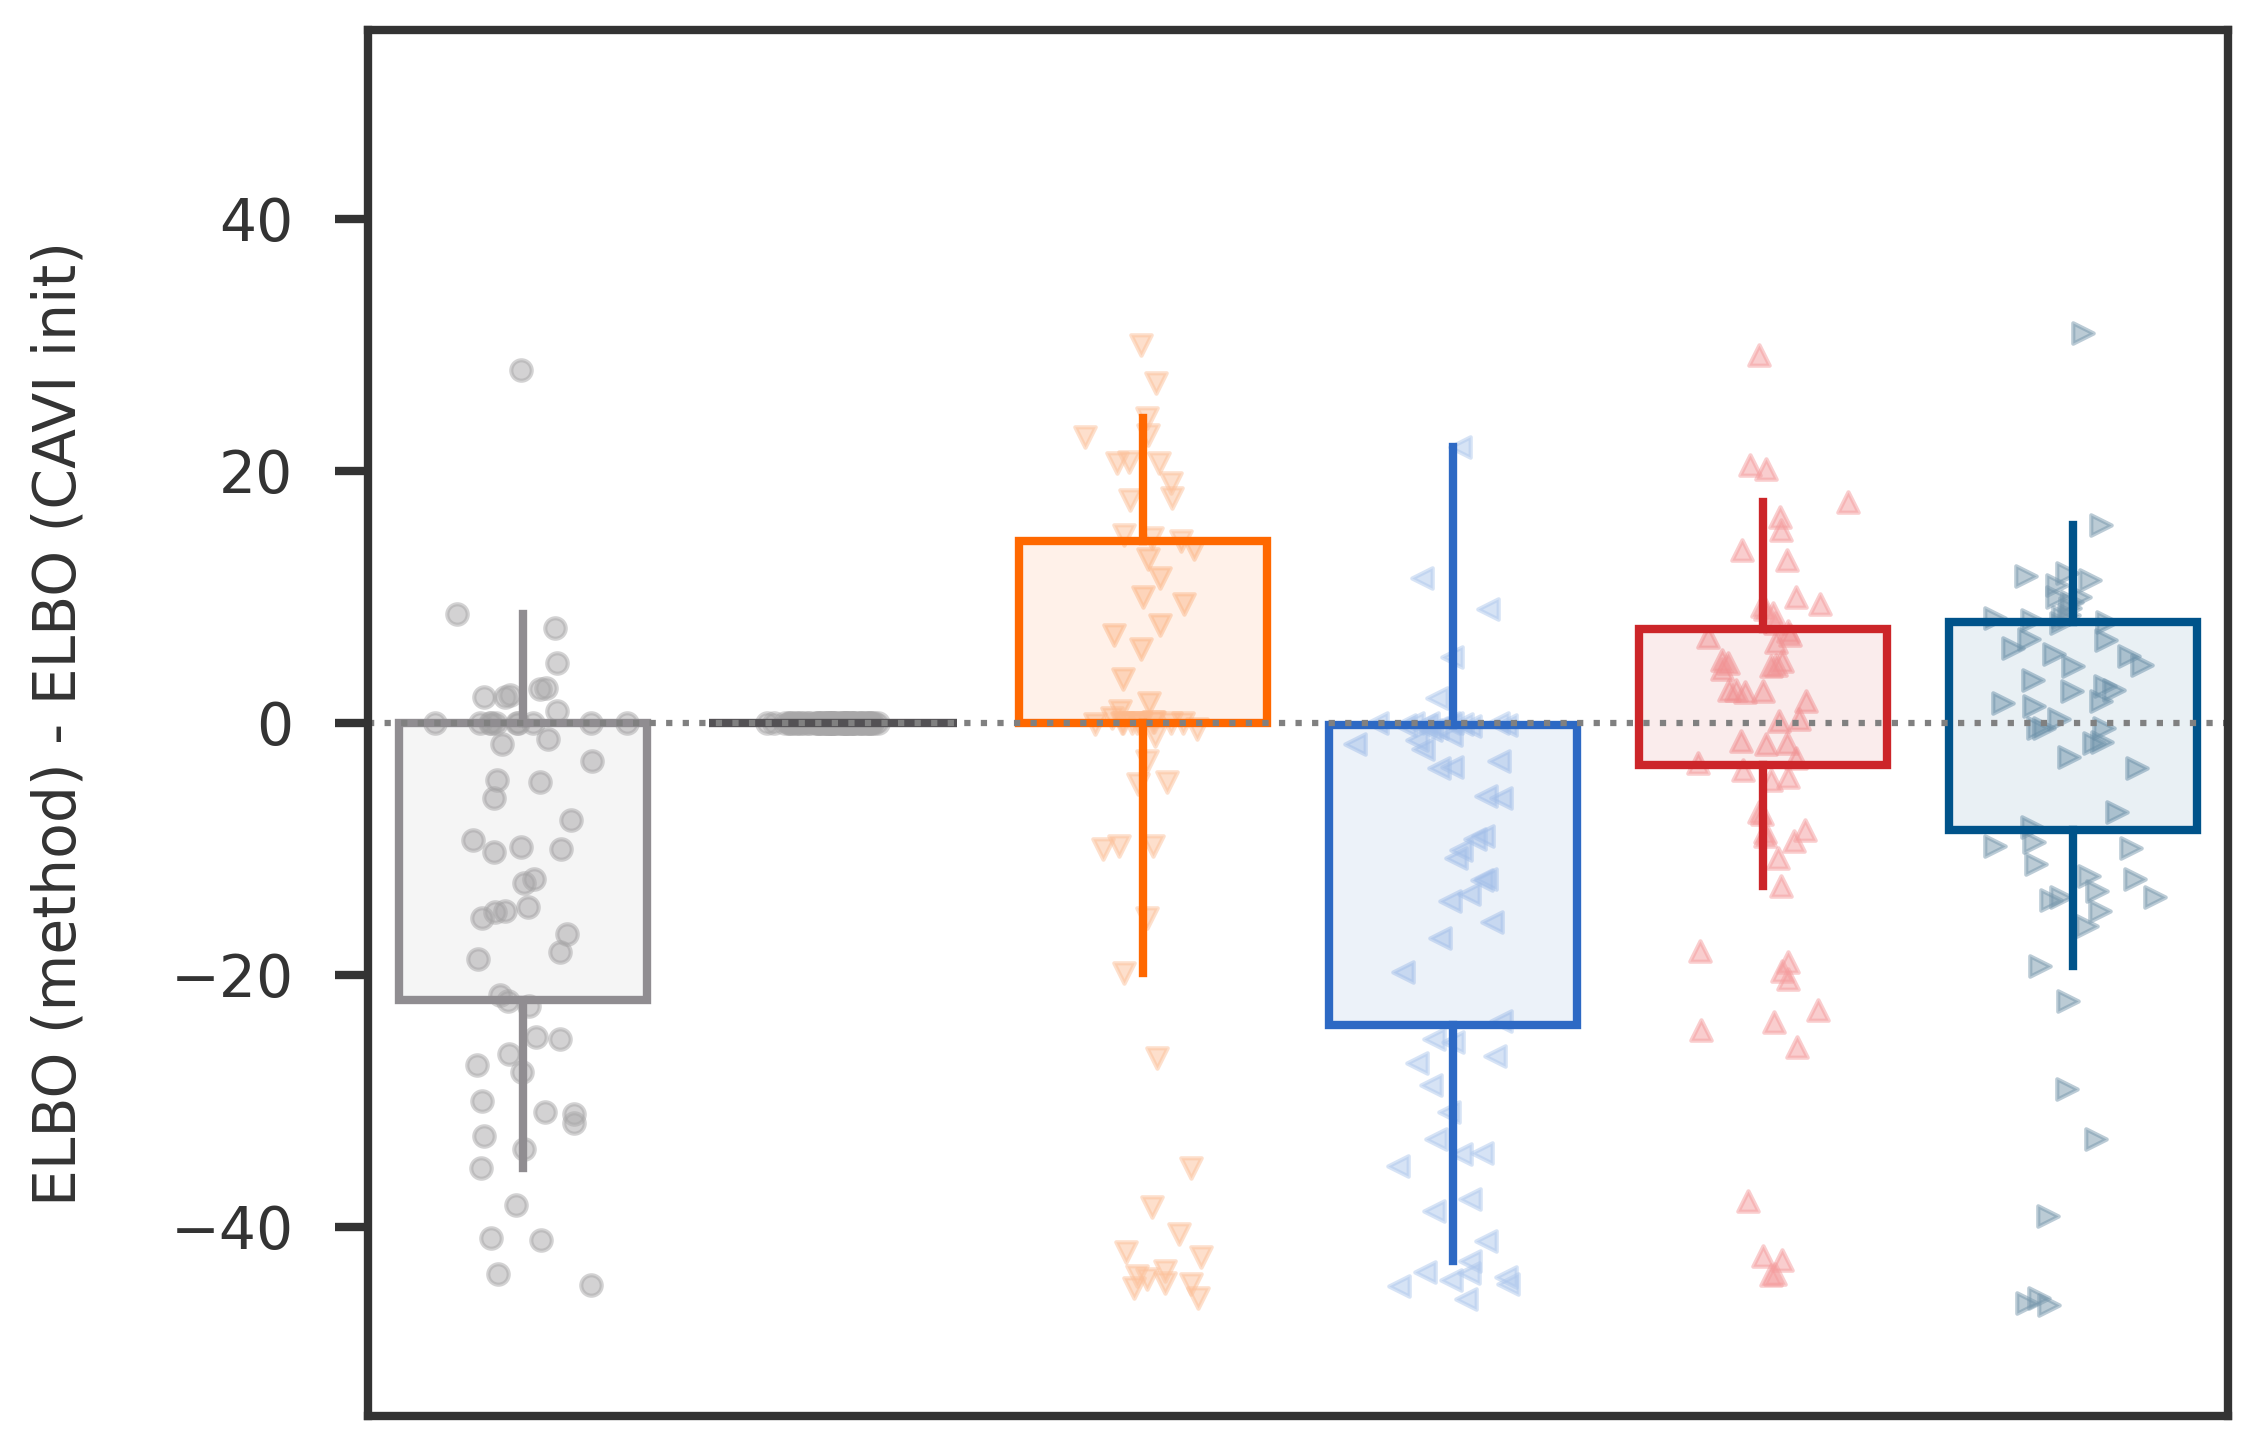

In [9]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

plotprefix = f"{plotdir}/blockdiag_elbo_comparison_boxplot"
ylim = None
ylim = [-55.0, 55.0]

fig = plt.figure(figsize = (8, 6))
ax1 = fig.add_subplot(111)

df = utils.pivot_simulation_stat(sparse_blockdiag_df, 'elbo')
dfmod = df.copy(deep = True)
for target in targets:
    dfmod[target] = -1. * (df[target] - df[reference])

outliers = fplot.compare_methods_with_boxplots(ax1, dfmod, targets,
                                               remove_outliers = True,
                                               is_truncate = True,
                                               ylim = ylim)

ax1.axhline(y = 0, linestyle = 'dotted', color = 'gray')
ax1.set_ylabel("ELBO (method) - ELBO (CAVI init)")
#ax1.set_xlabel("PVE")
ax1.set_xticks([])
if ylim is not None:
    ax1.set_ylim(ylim)

utils.saveplot(fig, plotprefix)
plt.show()

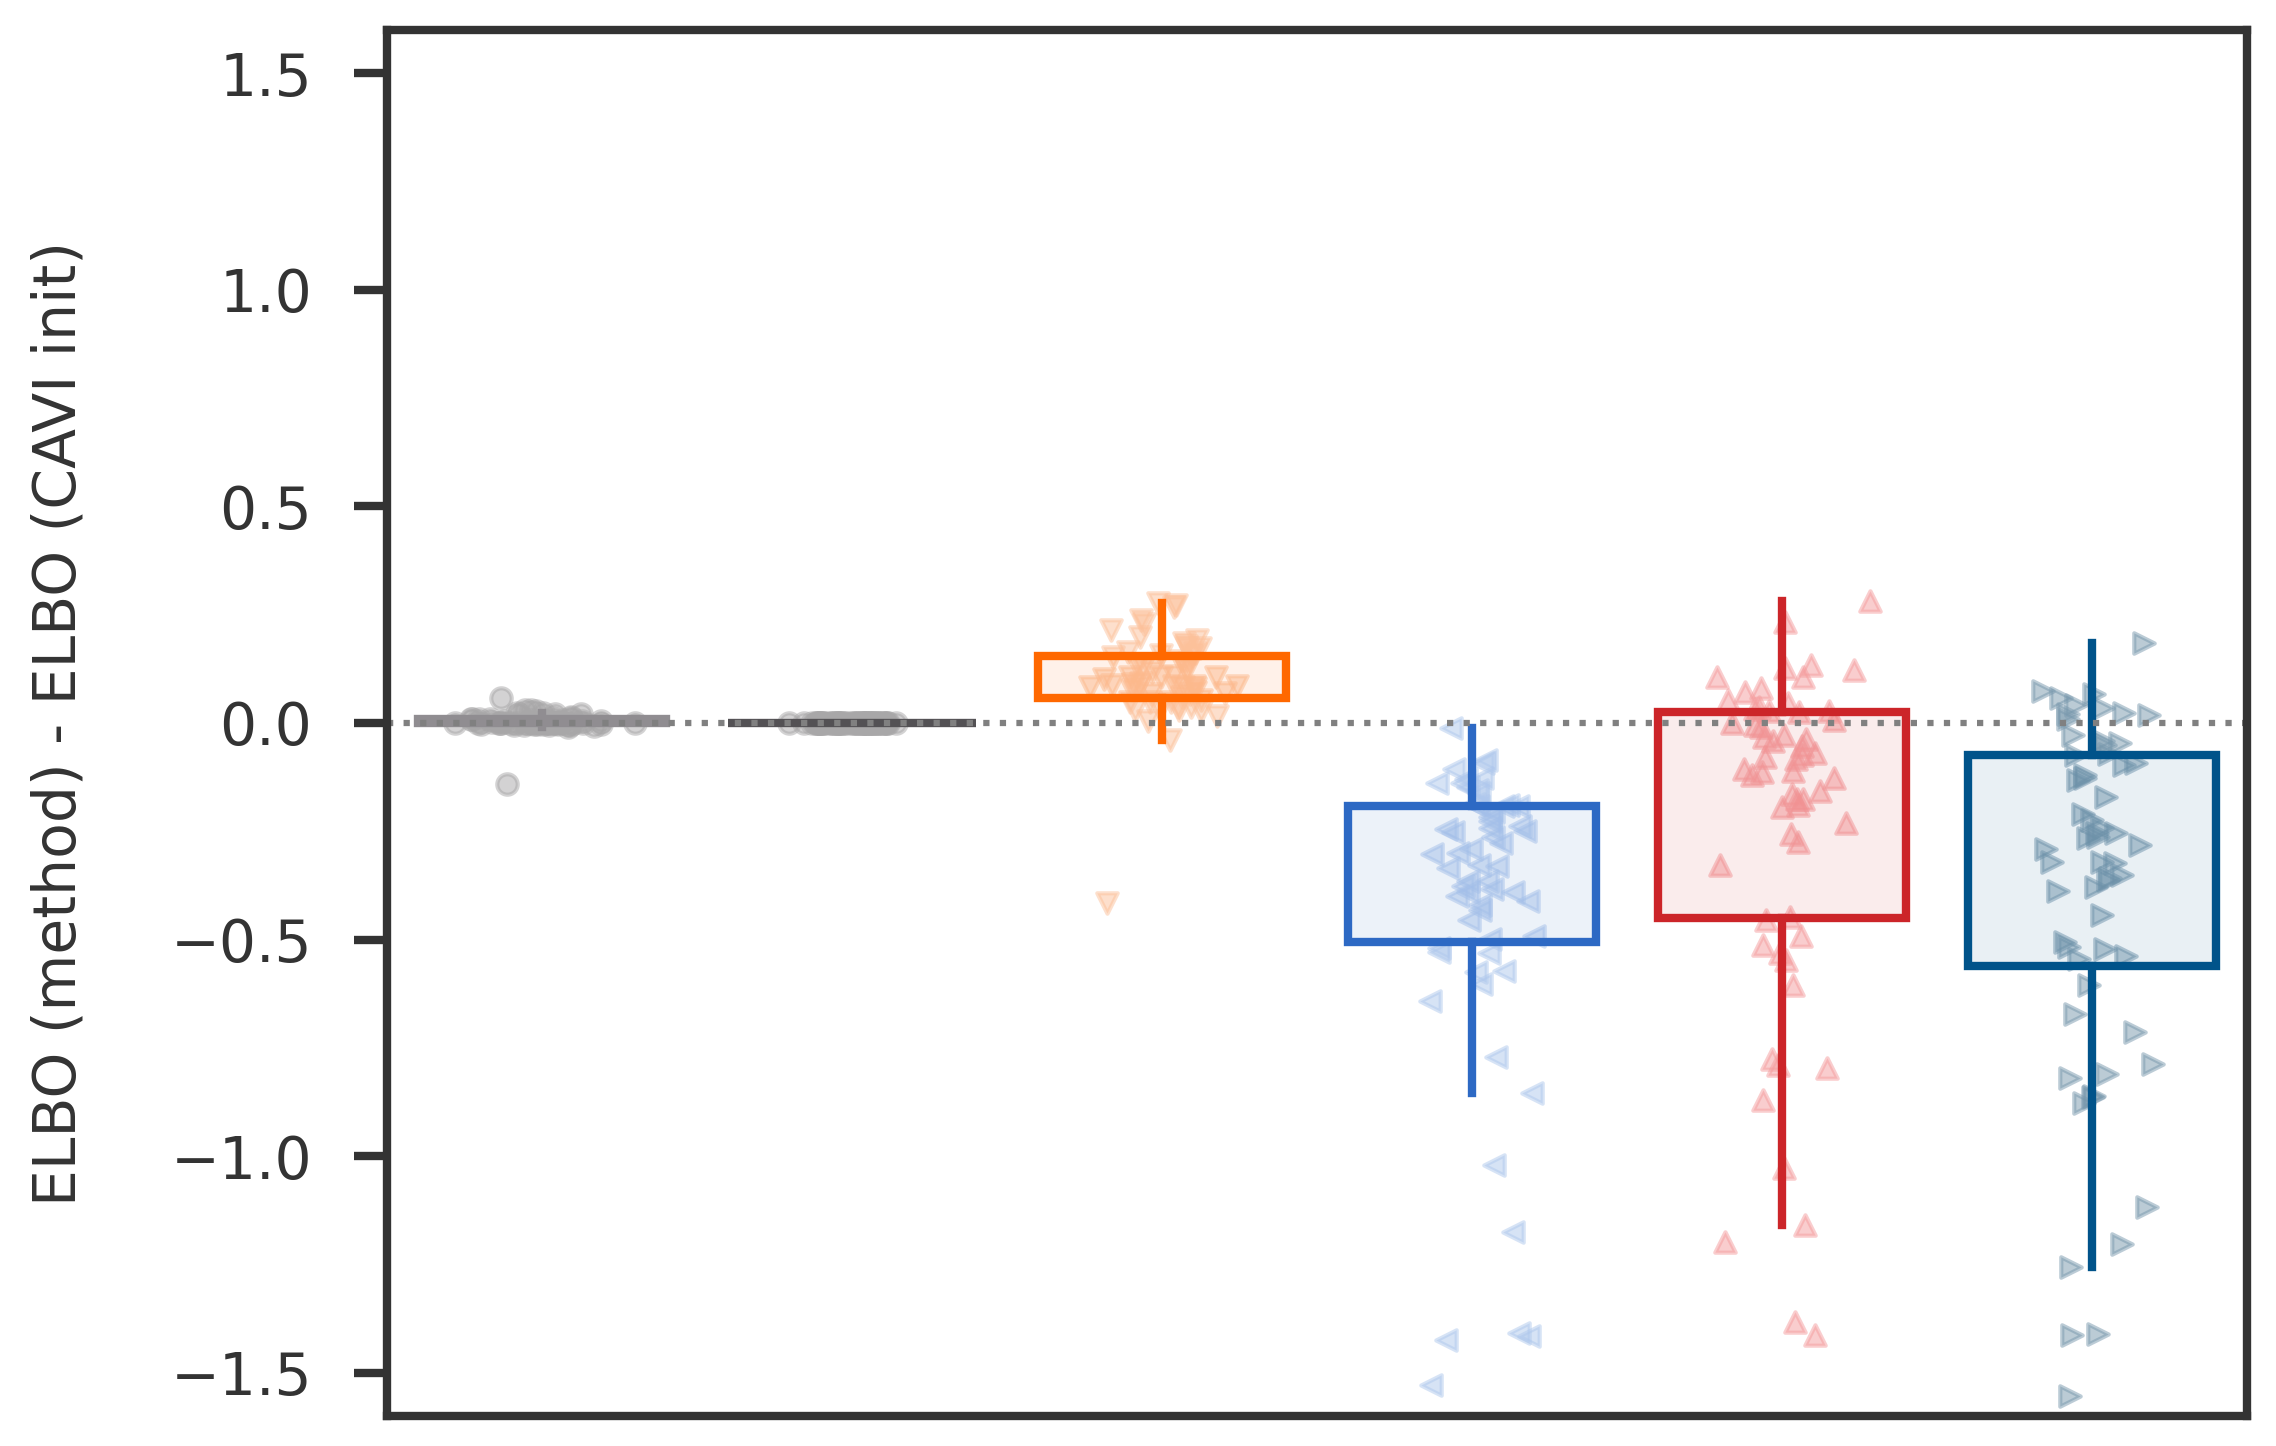

In [13]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

plotprefix = f"{plotdir}/indep_elbo_comparison_boxplot"
ylim = None
ylim = [-1.6, 1.6]

fig = plt.figure(figsize = (8, 6))
ax1 = fig.add_subplot(111)
remove_outliers = True

df = utils.pivot_simulation_stat(sparse_indep_df, 'elbo')
dfmod = df.copy(deep = True)
for target in targets:
    dfmod[target] = -1. * (df[target] - df[reference])

outliers = fplot.compare_methods_with_boxplots(ax1, dfmod, targets, ylim = ylim)

ax1.axhline(y = 0, linestyle = 'dotted', color = 'gray')
ax1.set_ylabel("ELBO (method) - ELBO (CAVI init)")
#ax1.set_xlabel("PVE")
ax1.set_xticks([])
if ylim is not None:
    ax1.set_ylim(ylim)

utils.saveplot(fig, plotprefix)
plt.show()

# RMSE comparison plots

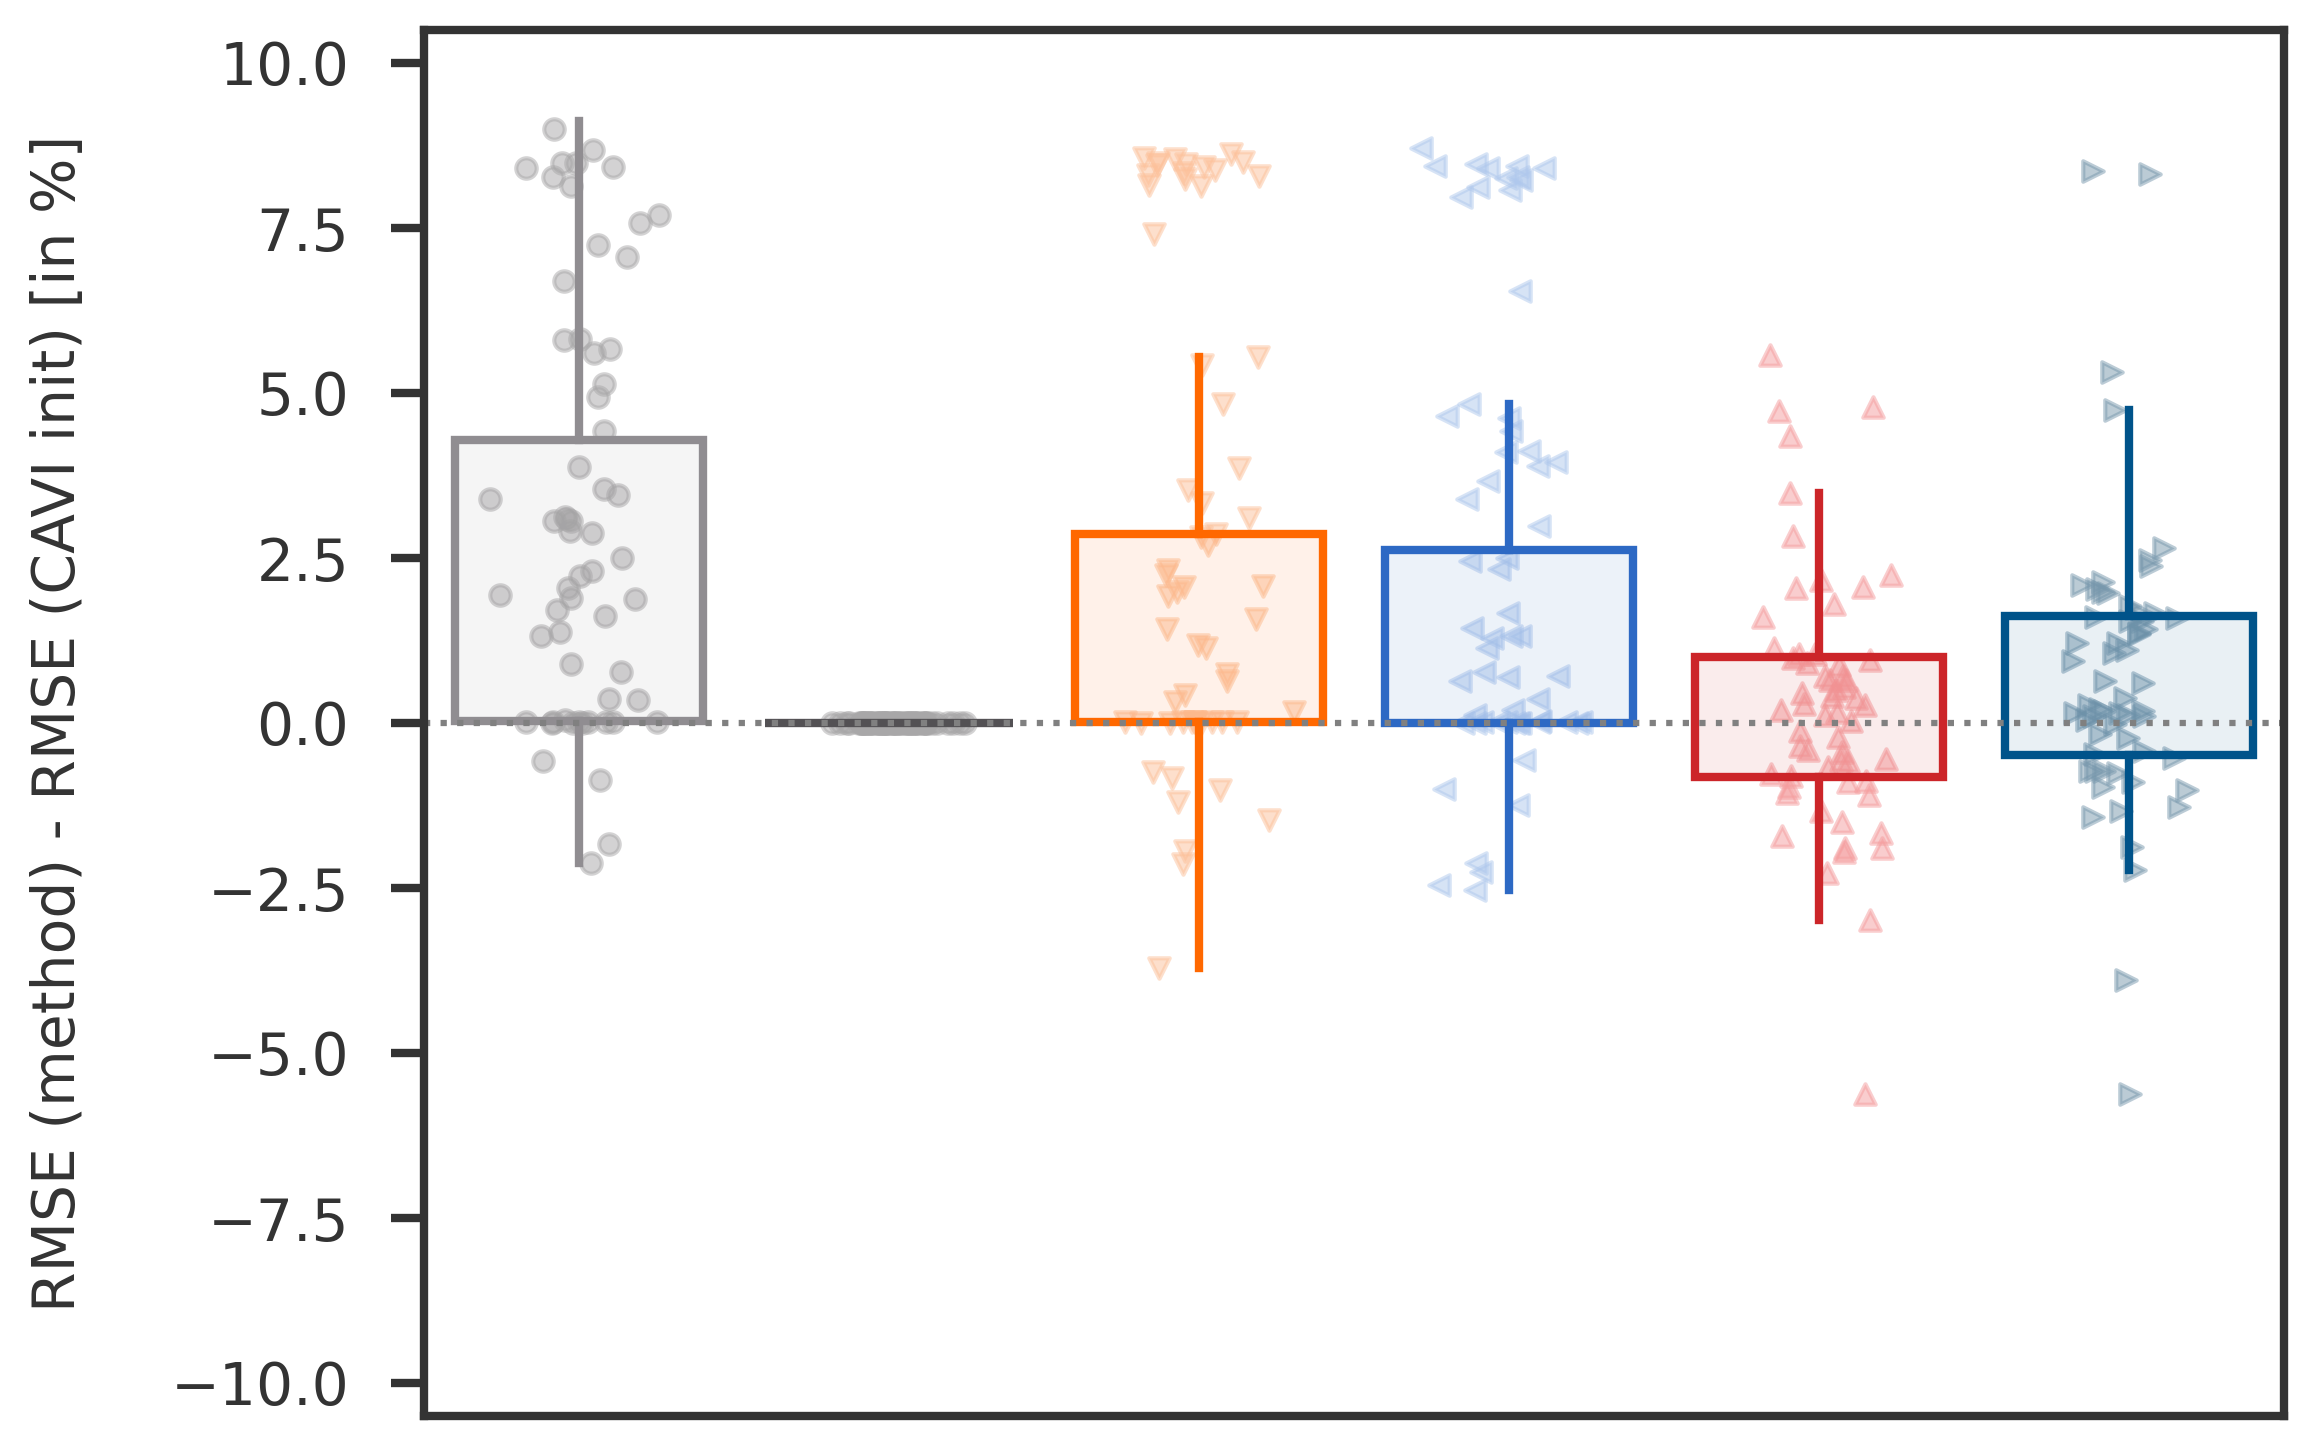

In [24]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

plotprefix = f"{plotdir}/blockdiag_rmse_comparison_boxplot"
ylim = None
ylim = [-10.5, 10.5]

fig = plt.figure(figsize = (8, 6))
ax1 = fig.add_subplot(111)
remove_outliers = True

df = utils.pivot_simulation_stat(sparse_blockdiag_df, 'mse')
dfmod = df.copy(deep = True)
refv  = np.sqrt(df[reference])
for target in targets:
    dfmod[target] = 100 * (np.sqrt(df[target]) - refv) / refv

outlier_factor = [10. for x in targets]
outlier_factor[0] = 1.6
outlier_factor[2] = 1.6
outlier_factor[3] = 1.6
outliers = fplot.compare_methods_with_boxplots(ax1, dfmod, targets, 
                                               remove_outliers = remove_outliers,
                                               is_truncate = True,
                                               outlier_factor = outlier_factor, ylim = ylim)

ax1.axhline(y = 0, linestyle = 'dotted', color = 'gray')
ax1.set_ylabel("RMSE (method) - RMSE (CAVI init) [in %]")
#ax1.set_xlabel("PVE")
ax1.set_xticks([])
if ylim is not None:
    ax1.set_ylim(ylim)

utils.saveplot(fig, plotprefix)
plt.show()

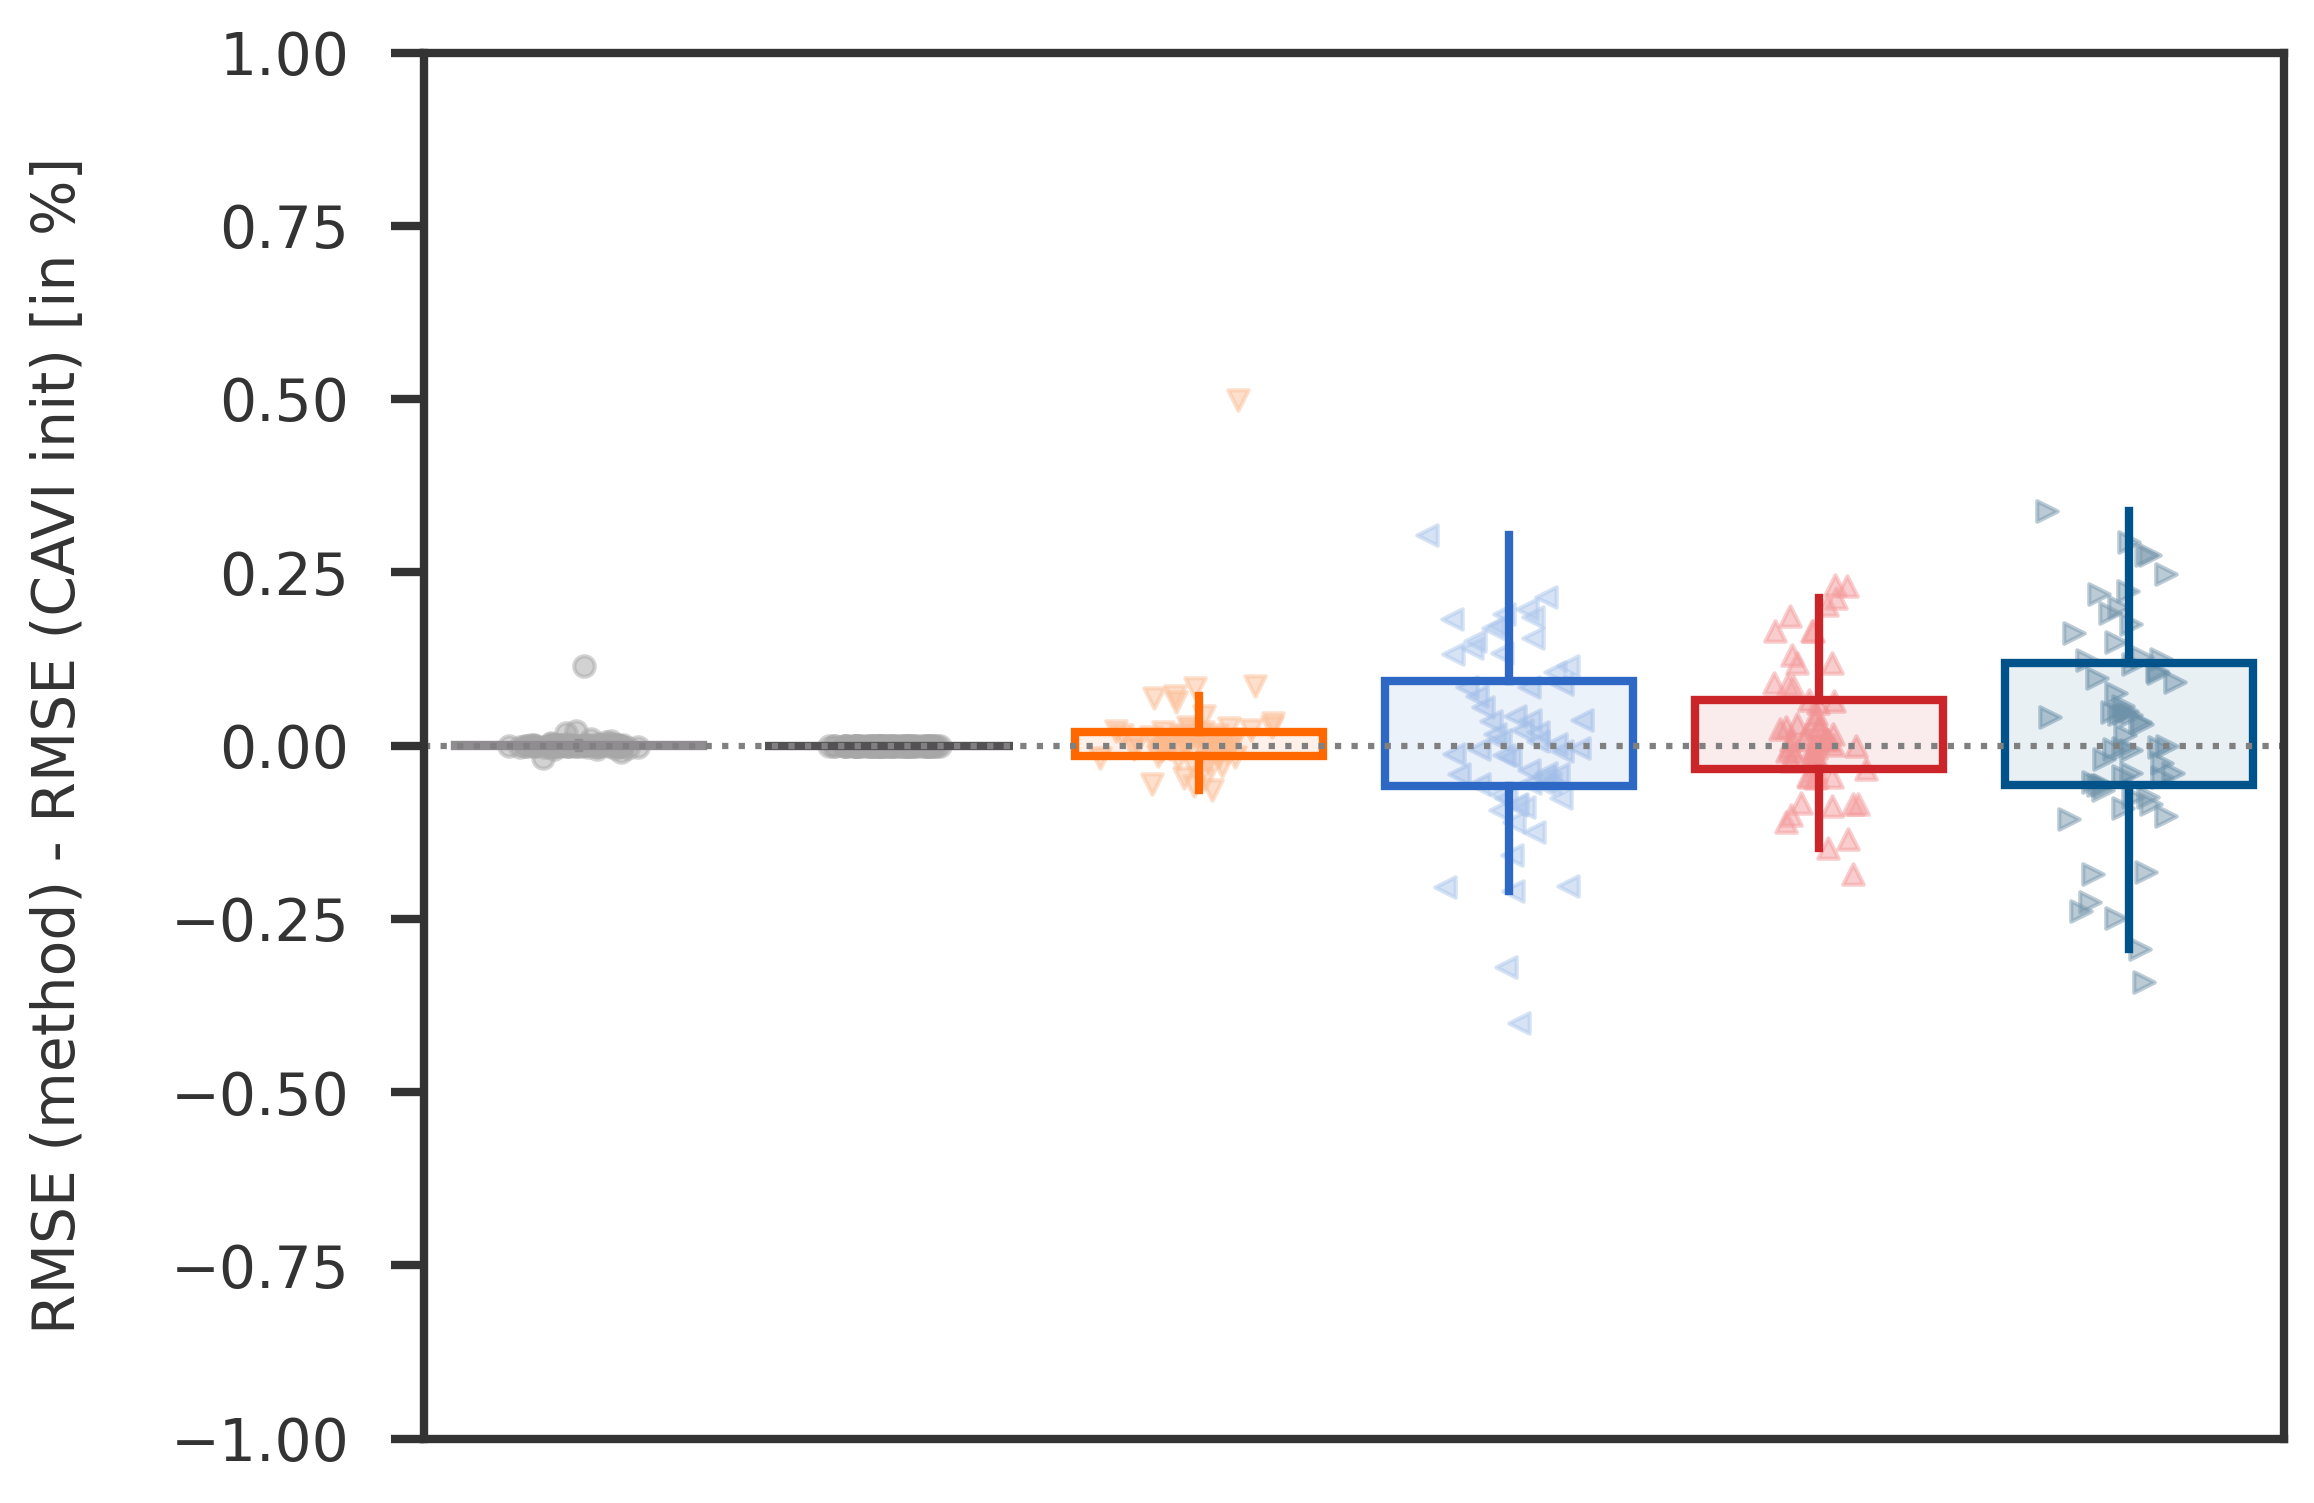

In [29]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

plotprefix = f"{plotdir}/indep_rmse_comparison_boxplot"
ylim = None
ylim = [-1, 1]

fig = plt.figure(figsize = (8, 6))
ax1 = fig.add_subplot(111)
remove_outliers = True

df = utils.pivot_simulation_stat(sparse_indep_df, 'mse')
dfmod = df.copy(deep = True)
refv  = np.sqrt(df[reference])
for target in targets:
    dfmod[target] = 100 * (np.sqrt(df[target]) - refv) / refv

outlier_factor = [10. for x in targets]
outliers = fplot.compare_methods_with_boxplots(ax1, dfmod, targets, 
                                               outlier_factor = outlier_factor, ylim = ylim)

ax1.axhline(y = 0, linestyle = 'dotted', color = 'gray')
ax1.set_ylabel("RMSE (method) - RMSE (CAVI init) [in %]")
#ax1.set_xlabel("PVE")
ax1.set_xticks([])
if ylim is not None:
    ax1.set_ylim(ylim)

utils.saveplot(fig, plotprefix)
plt.show()

# Number of iterations

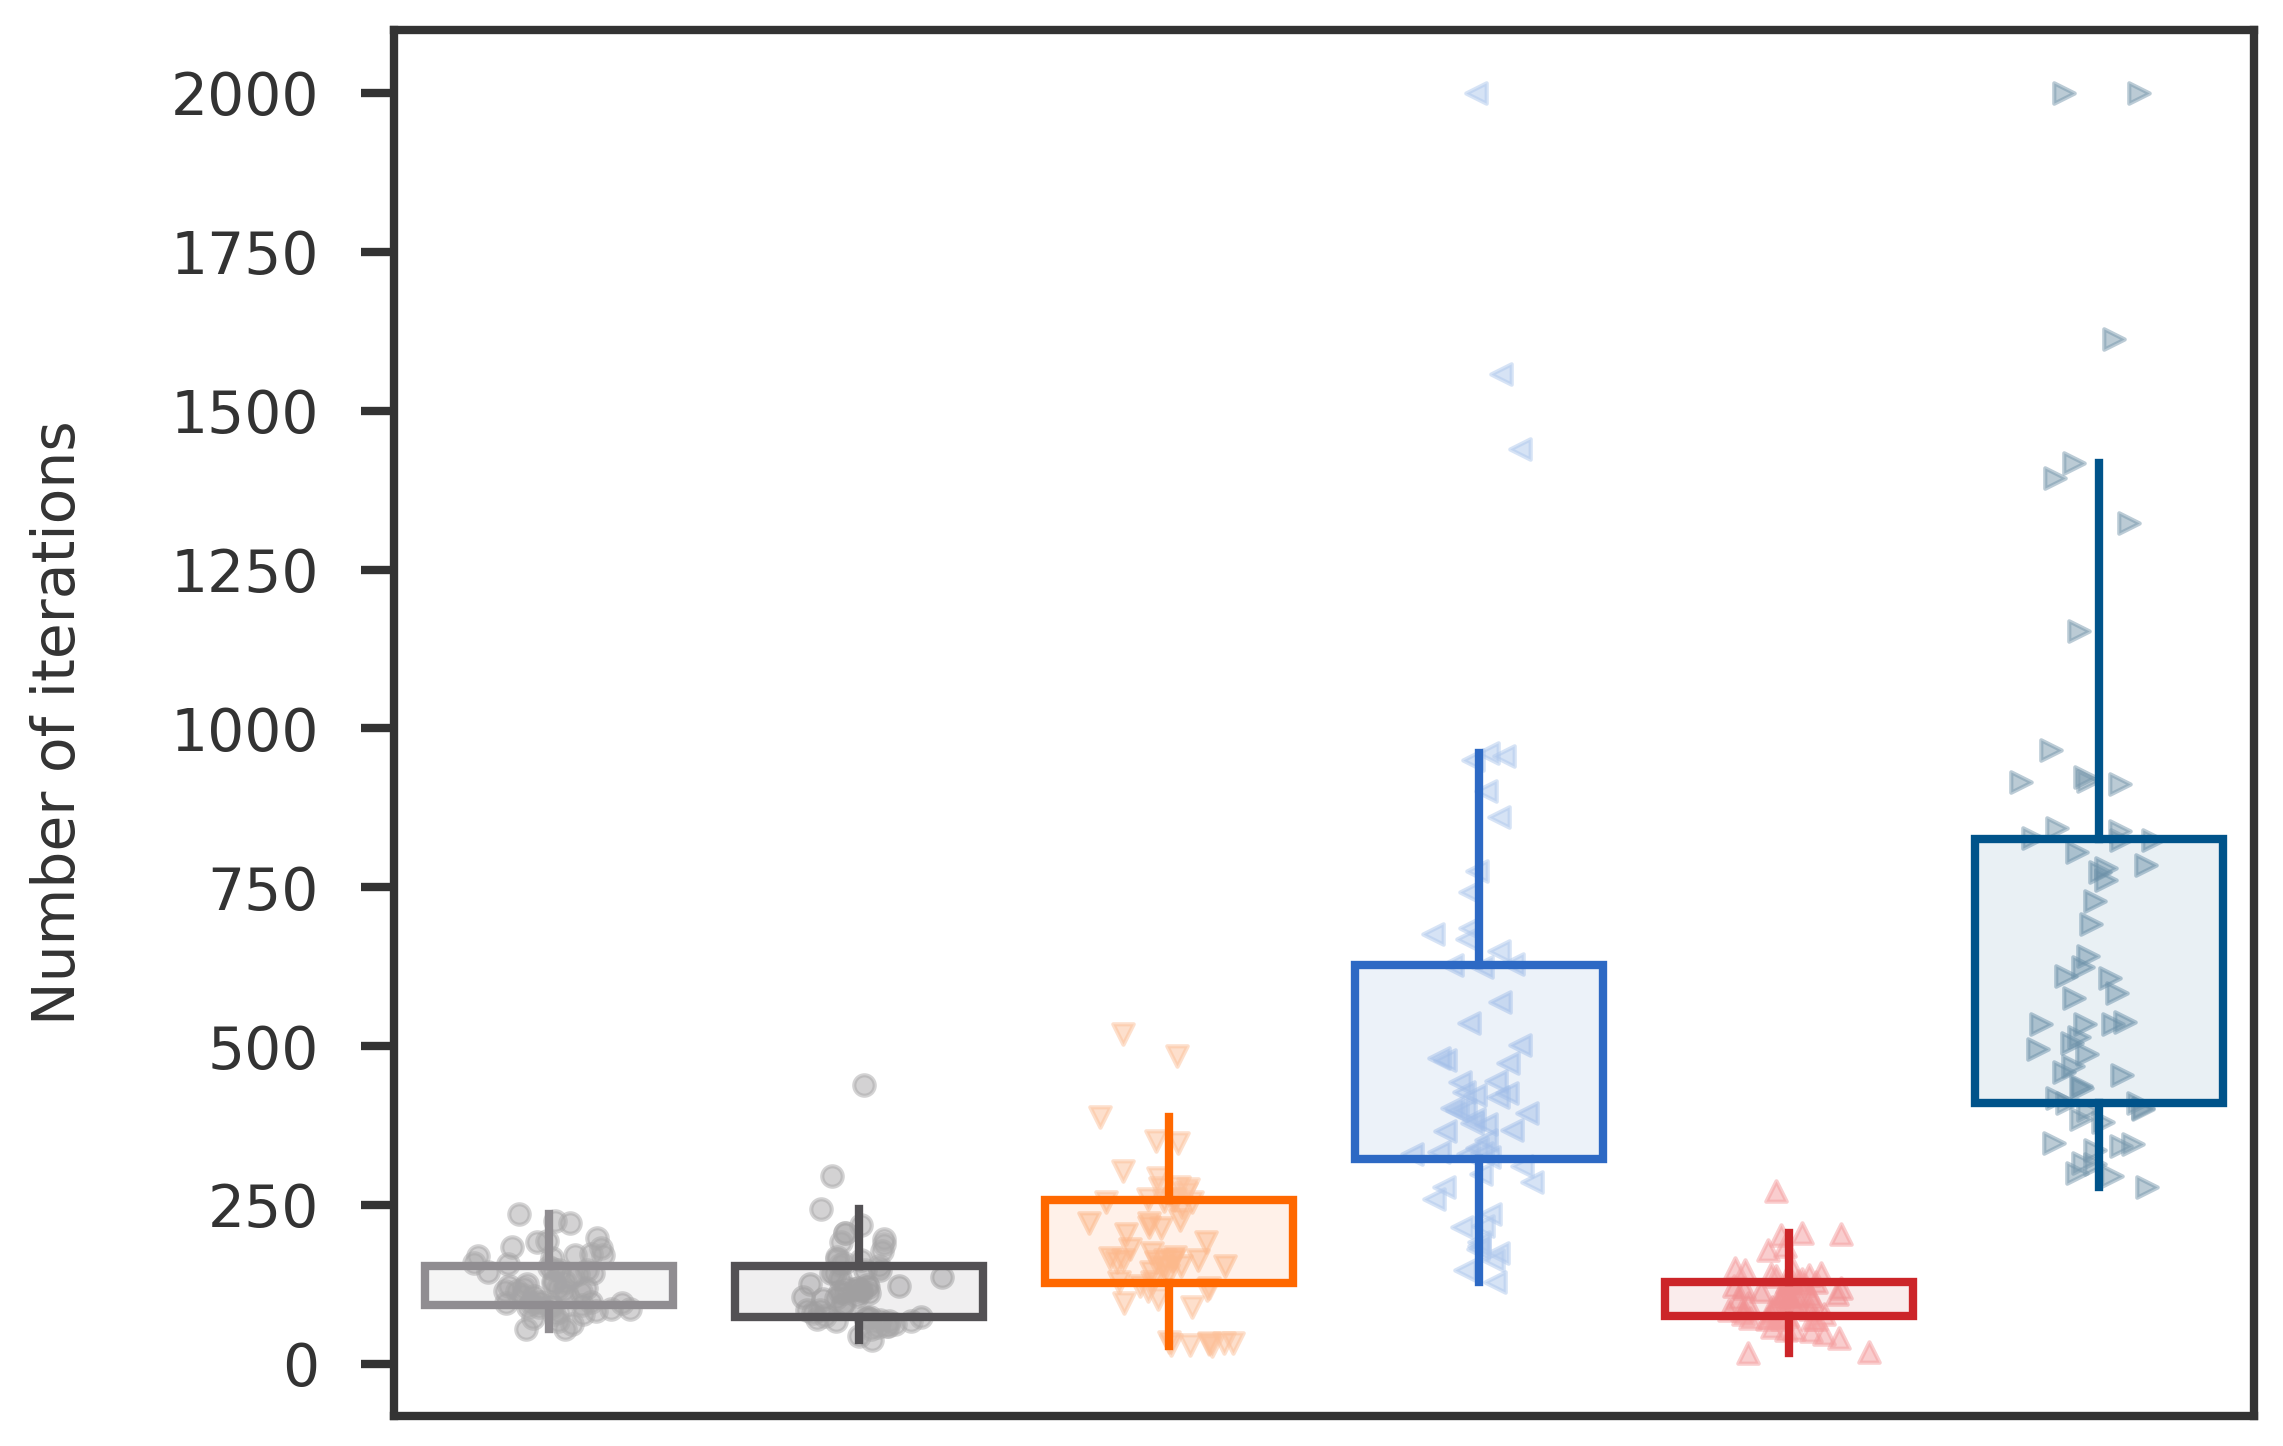

In [32]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)
plotprefix = f"{plotdir}/blockdiag_niter_comparison_boxplot"

fig = plt.figure(figsize = (8, 6))
ax1 = fig.add_subplot(111)

df = utils.pivot_simulation_stat(sparse_blockdiag_df, 'niter')
outliers = fplot.compare_methods_with_boxplots(ax1, df, targets)

ax1.set_ylabel("Number of iterations")
#ax1.set_xlabel("PVE")
ax1.set_xticks([])

utils.saveplot(fig, plotprefix)
plt.show()

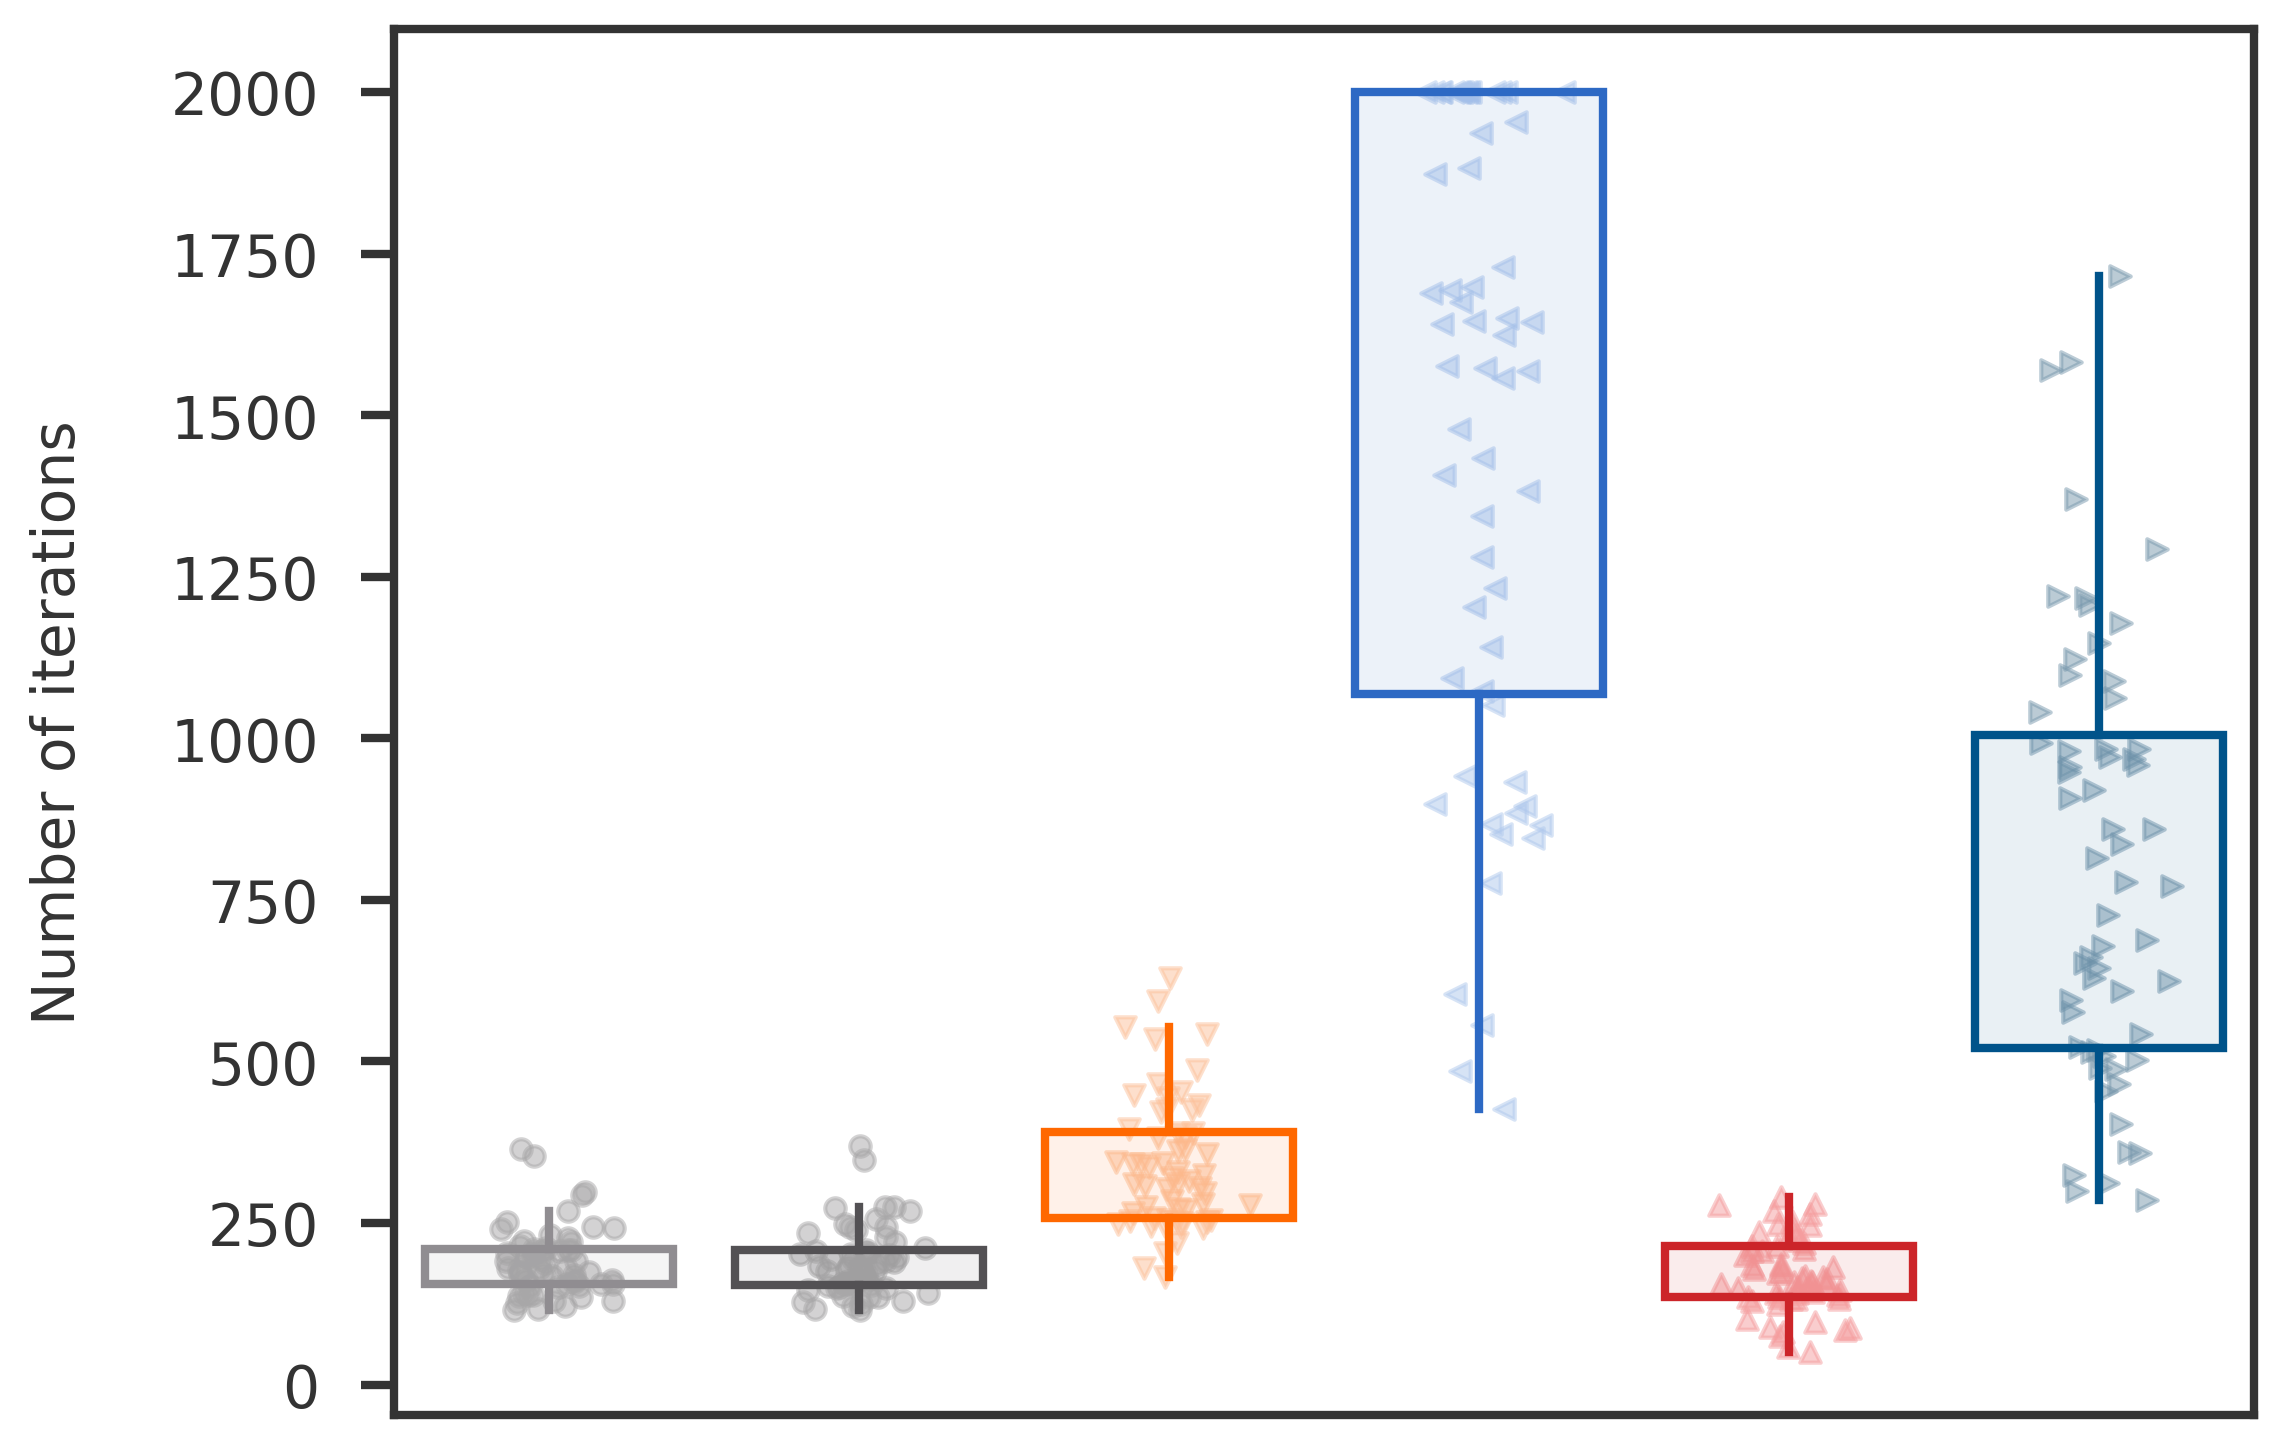

In [35]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)
plotprefix = f"{plotdir}/indep_niter_comparison_boxplot"

fig = plt.figure(figsize = (8, 6))
ax1 = fig.add_subplot(111)

df = utils.pivot_simulation_stat(sparse_indep_df, 'niter')
outliers = fplot.compare_methods_with_boxplots(ax1, df, targets)

ax1.set_ylabel("Number of iterations")
#ax1.set_xlabel("PVE")
ax1.set_xticks([])

utils.saveplot(fig, plotprefix)
plt.show()

# Runtime

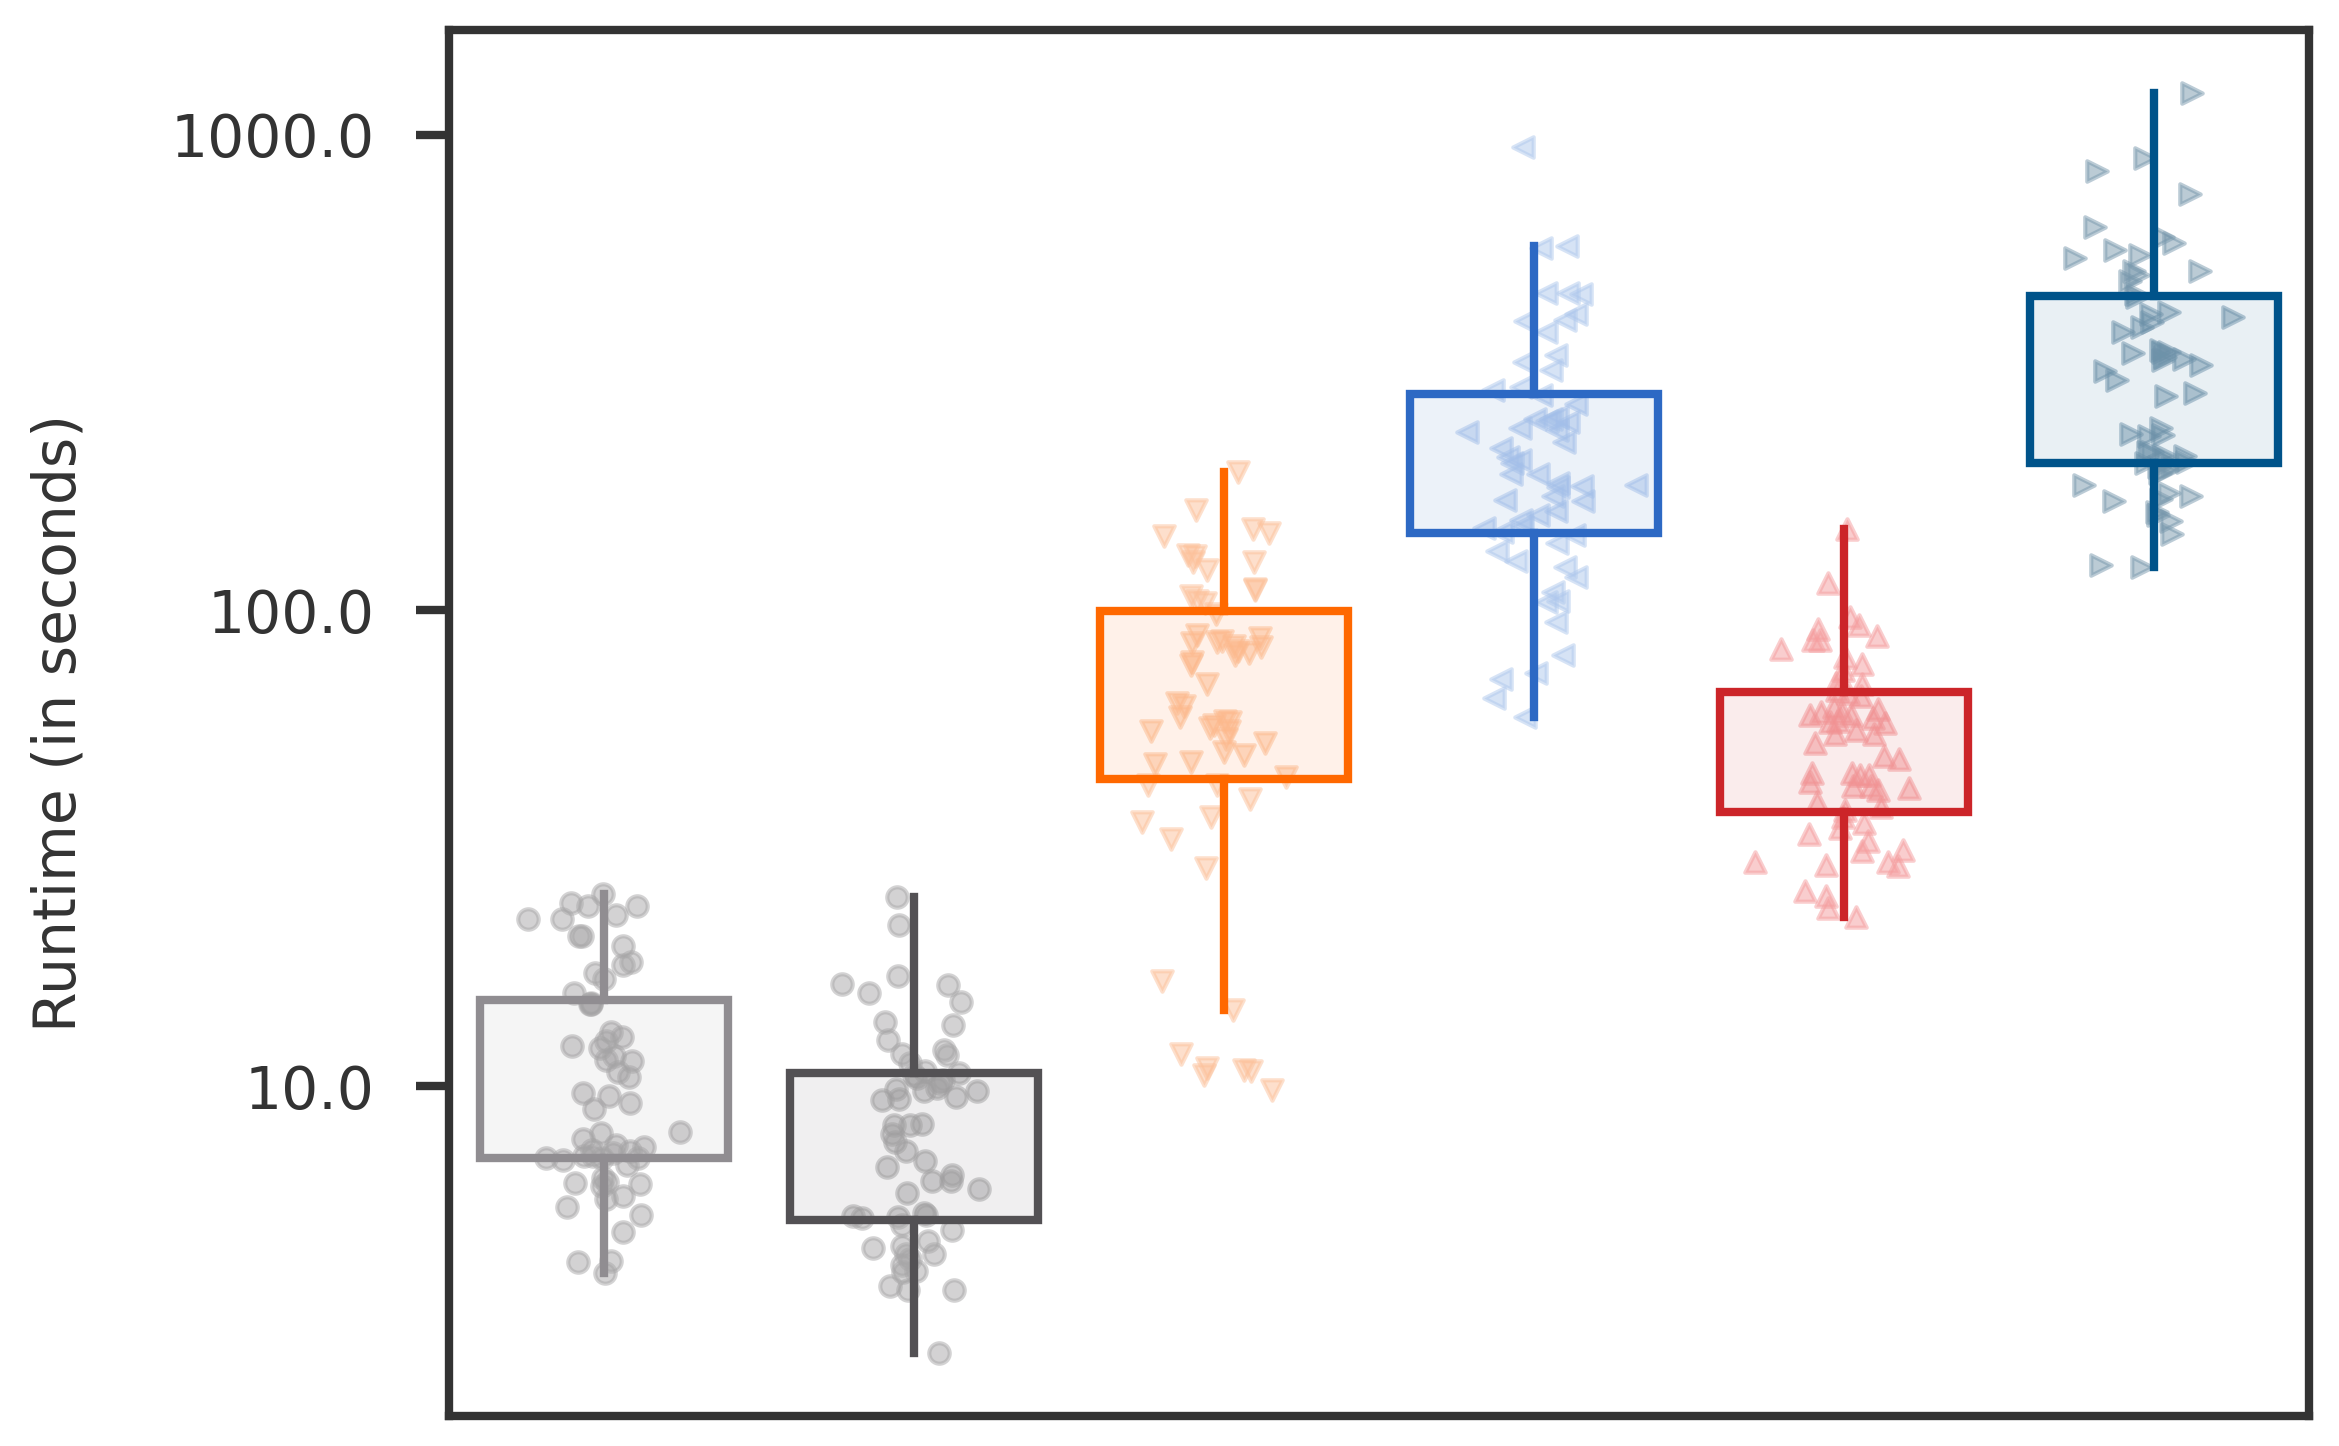

In [37]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)
plotprefix = f"{plotdir}/blockdiag_runtime_comparison_boxplot"

fig = plt.figure(figsize = (8, 6))
ax1 = fig.add_subplot(111)

df = utils.pivot_simulation_stat(sparse_blockdiag_df, 'runtime_wall')
dfmod = df.copy()
for target in targets:
    dfmod[target] = np.log10(df[target])
    

outliers = fplot.compare_methods_with_boxplots(ax1, dfmod, targets)

ax1.set_ylabel("Runtime (in seconds)")
#ax1.set_xlabel("PVE")
ax1.set_xticks([])

mpl_utils.set_yticks(ax1, scale = 'log10', spacing = 'log10')
utils.saveplot(fig, plotprefix)
plt.show()

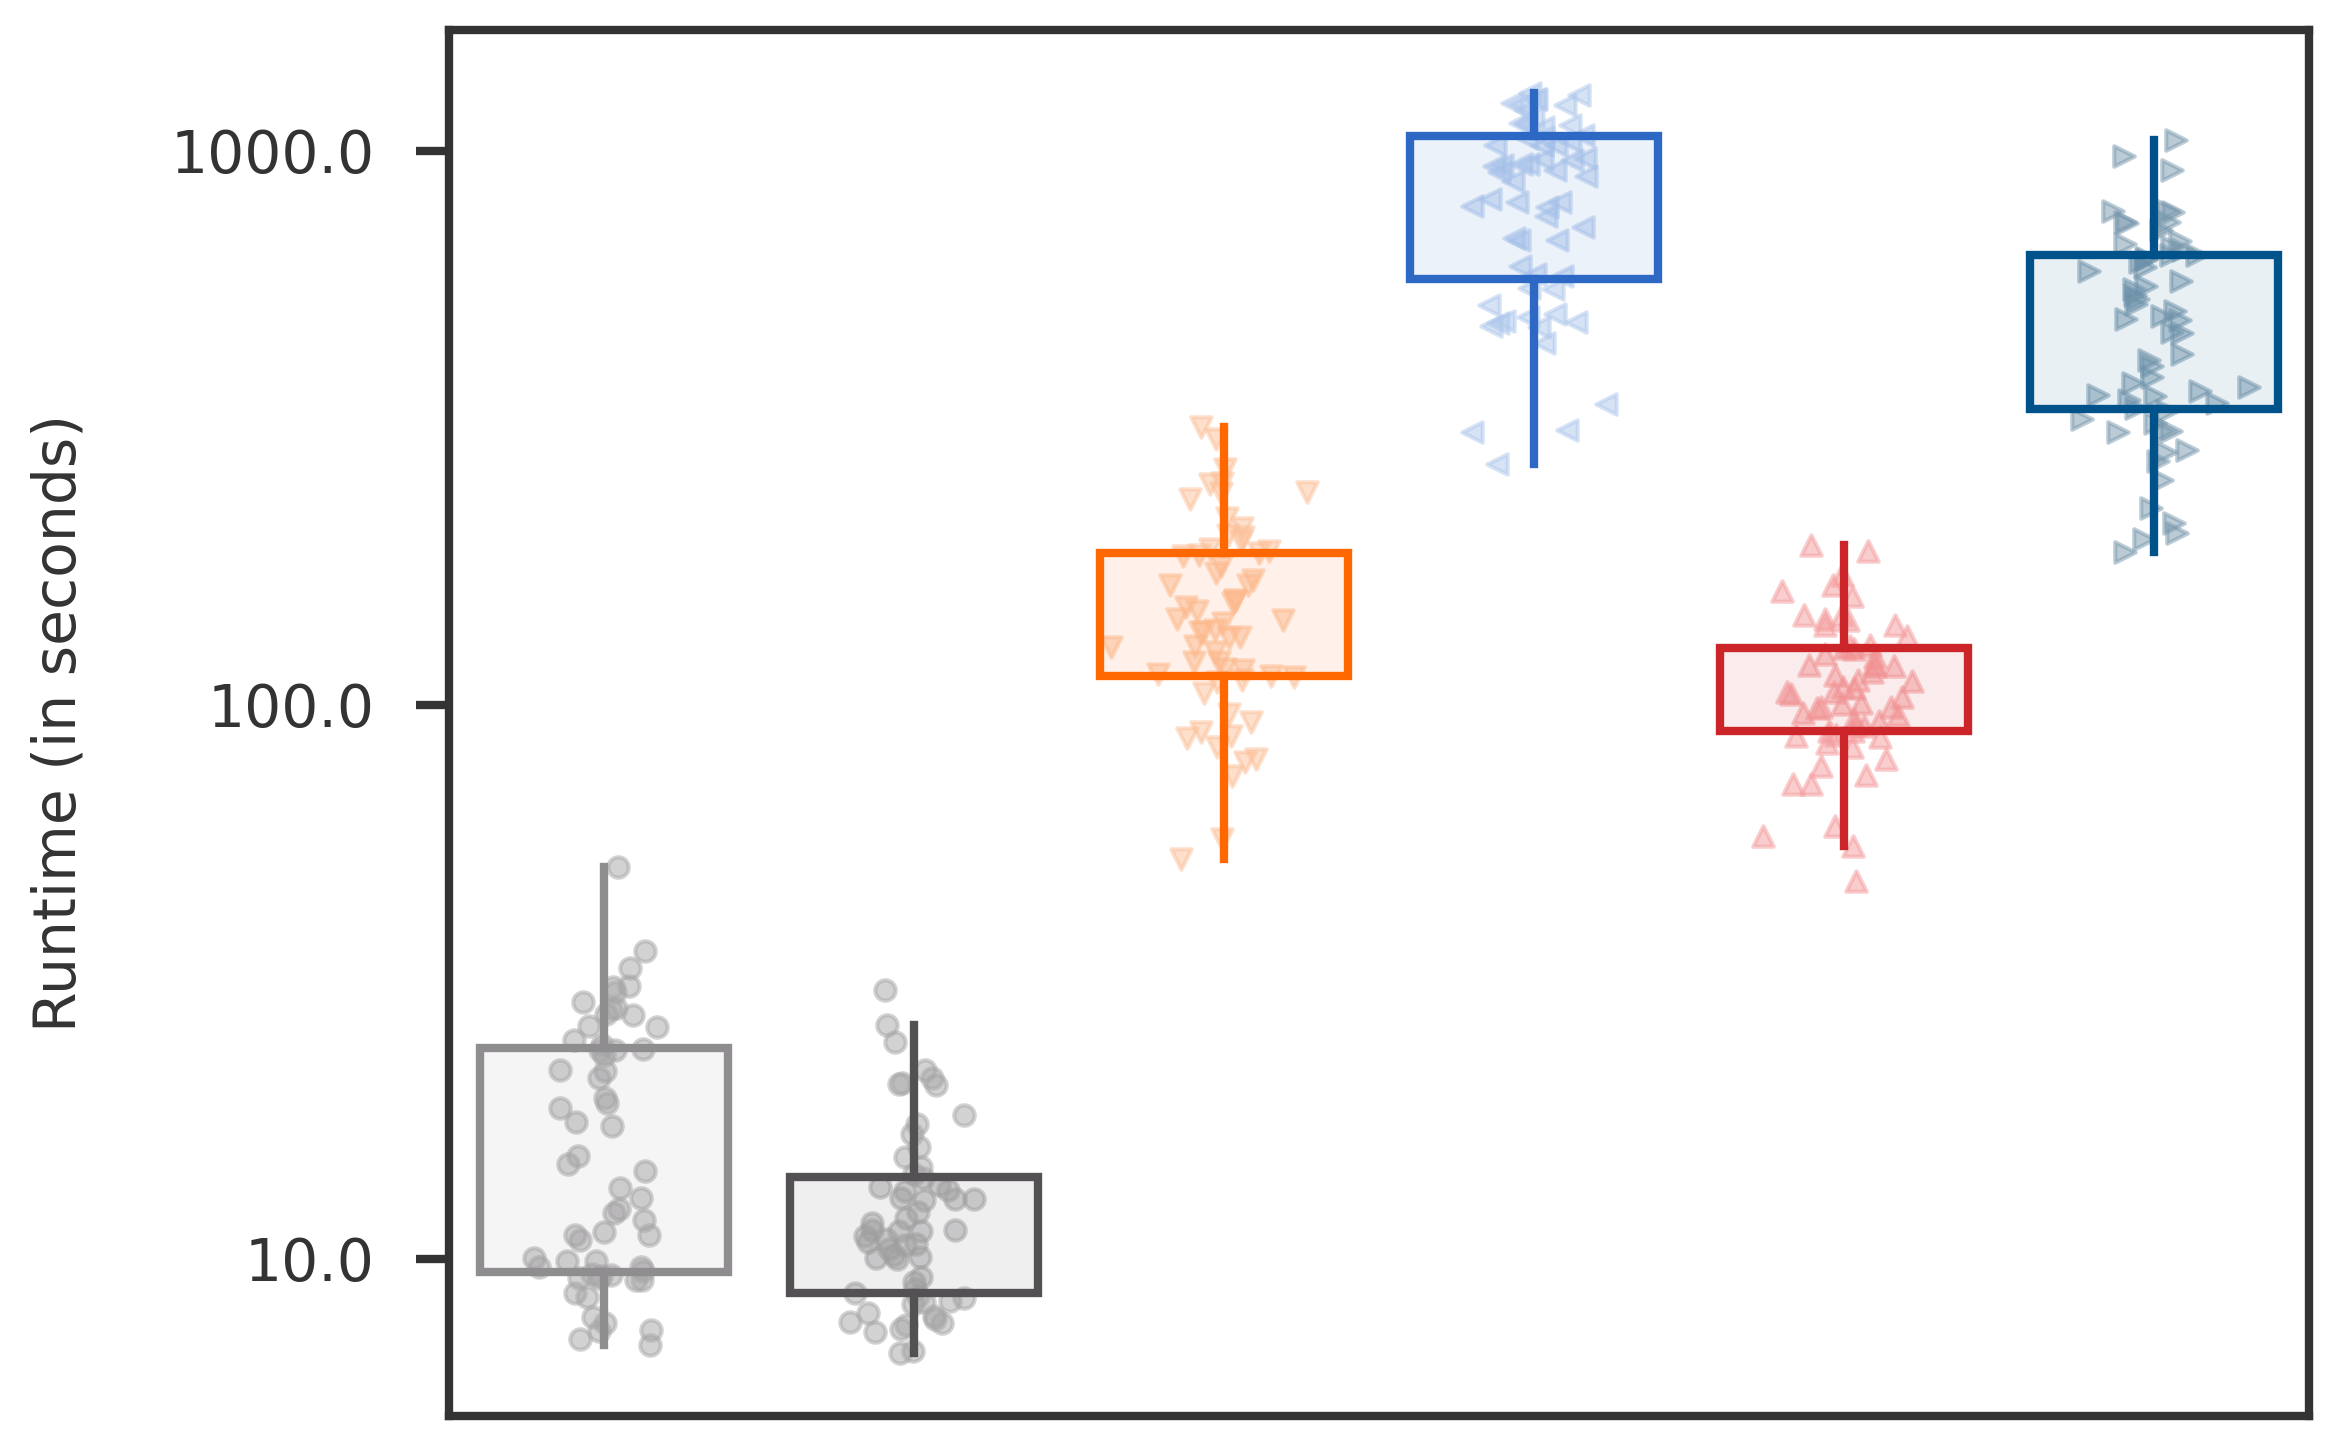

In [38]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)
plotprefix = f"{plotdir}/indep_runtime_comparison_boxplot"

fig = plt.figure(figsize = (8, 6))
ax1 = fig.add_subplot(111)

df = utils.pivot_simulation_stat(sparse_indep_df, 'runtime_wall')
dfmod = df.copy()
for target in targets:
    dfmod[target] = np.log10(df[target])
    

outliers = fplot.compare_methods_with_boxplots(ax1, dfmod, targets)

ax1.set_ylabel("Runtime (in seconds)")
#ax1.set_xlabel("PVE")
ax1.set_xticks([])

mpl_utils.set_yticks(ax1, scale = 'log10', spacing = 'log10')
utils.saveplot(fig, plotprefix)
plt.show()

# Legend

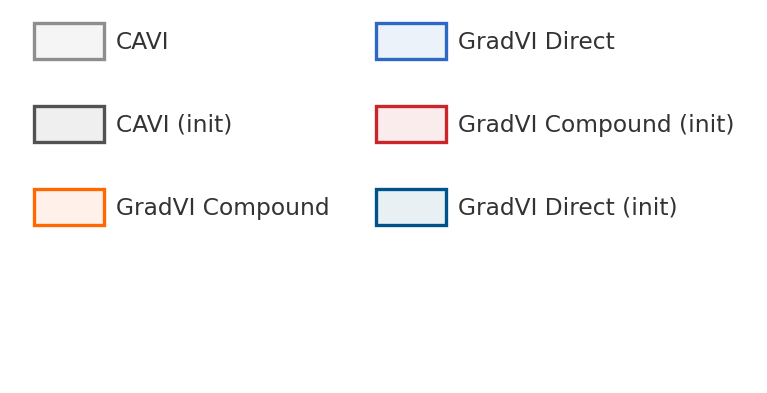

In [39]:
from matplotlib.patches import Patch
import methodprops

plotprefix = "linreg_boxplot_legend"

mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 120)
plotmeta = methodprops.plot_metainfo()

fig = plt.figure(figsize = (8, 4))
ax1 = fig.add_subplot(111)

for side, border in ax1.spines.items():
    border.set_visible(False)
ax1.tick_params(bottom = False, top = False, left = False, right = False,
    labelbottom = False, labeltop = False, labelleft = False, labelright = False)

mlabels = []
mhandles = []
for target in targets:
    boxcolor = plotmeta[target].color
    boxface = f'#{boxcolor[1:]}16'
    boxlabel = plotmeta[target].label
    handle = Patch(facecolor = boxface, edgecolor = boxcolor, label = boxlabel, lw = 2)
    mhandles.append(handle)
    mlabels.append(boxlabel)
    
leg = ax1.legend(handles = mhandles, labels = mlabels, ncols = 2, 
                 handlelength = 3, handleheight = 2,
                 labelspacing = 2,
                 loc = 'upper center')

utils.saveplot(fig, plotprefix)
plt.show()